<a href="https://colab.research.google.com/github/Andriansyah2501/BMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Andrian_Syah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
sns.set(style="whitegrid")

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
# Memuat dataset sekali saja
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
isnull_sum = df.isnull().sum()
print(isnull_sum)

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
duplicated_sum = df.duplicated().sum()
print(duplicated_sum)

21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih fitur numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop kolom id dari fitur numerik jika ada
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Lakukan MinMax Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Contoh hasil feature scaling (MinMaxScaler):")
print(df[numerical_cols].head())


Contoh hasil feature scaling (MinMaxScaler):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874          NaN             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])
print(df.head())

   TransactionAmount PreviousTransactionDate TransactionType   Location  \
0           0.007207     2023-04-11 16:29:14           Debit  San Diego   
1           0.195940     2023-06-27 16:44:19           Debit    Houston   
2           0.065680     2023-07-10 18:16:08           Debit       Mesa   
3           0.096016     2023-05-05 16:32:11           Debit    Raleigh   
4           0.006874     2023-10-16 17:51:24          Credit    Atlanta   

  Channel  CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     ATM     0.838710             Doctor             0.244828            0.0   
1     ATM     0.806452             Doctor             0.451724            0.0   
2  Online     0.016129            Student             0.158621            0.0   
3  Online     0.129032            Student             0.051724            0.0   
4  Online          NaN            Student             0.648276            0.0   

   AccountBalance     TransactionDate  
0        0.336832  202

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Terapkan LabelEncoder untuk setiap kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Contoh hasil feature encoding (LabelEncoder):")
print(df[categorical_cols].head())

Contoh hasil feature encoding (LabelEncoder):
   PreviousTransactionDate  TransactionType  Location  Channel  \
0                      680                1        36        0   
1                     1178                1        15        0   
2                     1262                1        23        2   
3                      818                1        33        2   
4                     1939                0         1        2   

   CustomerOccupation  TransactionDate  
0                   0              105  
1                   0              192  
2                   3               41  
3                   3              163  
4                   3               16  


In [14]:
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

=== Contoh Data ===
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
5           0.047888     0.000000             0.558621            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
5        0.045738  

=== Statistik Deskriptif Data ===
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2420.000000  2420.000000          2420.000000    2420.000000   
mean            0.154880     0.430079             0.377129       0.029752   
std             0.151731     0.288086             0.242653       0.146416   
min             0.000000     0.000000             0.000000       0.000000   
2

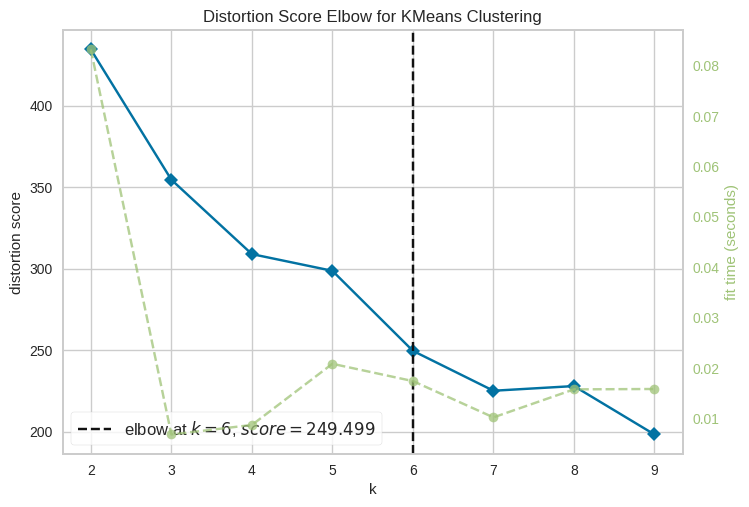


=== Melatih Model KMeans ===
Model berhasil disimpan sebagai 'model_clustering.h5'


In [19]:
# Import library
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import joblib

# === 1. Ambil fitur numerik dan hilangkan missing value ===
df_clustering = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
df_clustering = df_clustering.dropna()

# Tampilkan contoh data (opsional)
print("=== Contoh Data ===")
print(df_clustering.head())

# === 2. Statistik Deskriptif ===
print("\n=== Statistik Deskriptif Data ===")
print(df_clustering.describe())

# === 3. Visualisasi Elbow Method ===
print("\n=== Elbow Method ===")
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_clustering)
visualizer.show()

# Scaling fitur numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# === 4. KMeans Clustering dan Simpan Model ===
print("\n=== Melatih Model KMeans ===")
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(df_scaled)

# Simpan model
joblib.dump(model_kmeans, "model_clustering.h5")
print("Model berhasil disimpan sebagai 'model_clustering.h5'")

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [20]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

# Hitung nilai Silhouette Score
score = silhouette_score(df_clustering, model_kmeans.labels_)

# Tampilkan hasil
print(f"\n=== Silhouette Score ===\nNilai Silhouette Score: {score:.4f}")



=== Silhouette Score ===
Nilai Silhouette Score: 0.2572


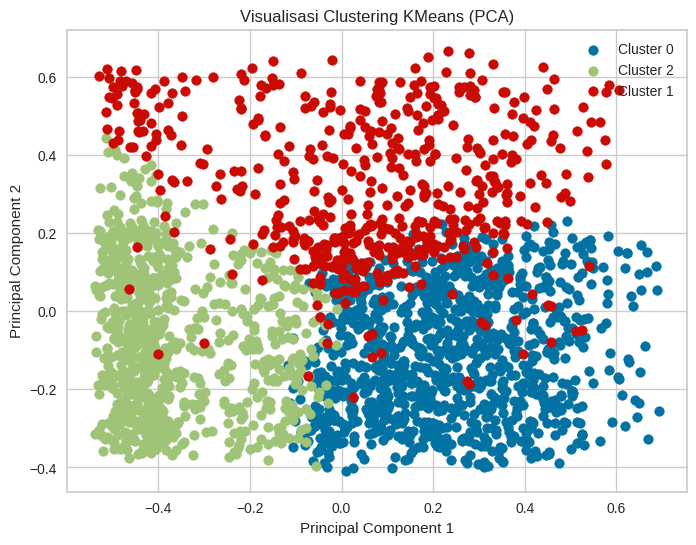

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Kurangi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_clustering)

# Buat DataFrame baru untuk visualisasi
df_vis = pd.DataFrame(df_2d, columns=['PC1', 'PC2'])
df_vis['Cluster'] = model_kmeans.labels_

# Plot hasil clustering
plt.figure(figsize=(8, 6))
for cluster in df_vis['Cluster'].unique():
    plt.scatter(
        df_vis[df_vis['Cluster'] == cluster]['PC1'],
        df_vis[df_vis['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )

plt.title('Visualisasi Clustering KMeans (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [22]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [23]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [24]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Pilih fitur numerik
df_clustering['Cluster'] = model_kmeans.labels_

# Pilih fitur numerik (selain kolom 'Cluster')
fitur_numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Group by berdasarkan Cluster, lalu hitung agregasi
df_agg = df_clustering.groupby('Cluster')[fitur_numerik].agg(['mean', 'min', 'max'])

# Tampilkan statistik deskriptif: mean, min, dan max
print("=== Analisis Deskriptif (Mean, Min, Max) ===")
print(df_agg)

=== Analisis Deskriptif (Mean, Min, Max) ===
        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0                0.145143  0.000031  0.954092    0.617316  0.080645  1.000000   
1                0.153211  0.000099  1.000000    0.466383  0.000000  1.000000   
2                0.169582  0.000000  0.918269    0.144376  0.000000  0.645161   

        TransactionDuration                     LoginAttempts             \
                       mean       min       max          mean  min   max   
Cluster                                                                    
0                  0.268268  0.000000  0.589655      0.004852  0.0  0.75   
1                  0.691027  0.155172  1.000000      0.099462  0.0  1.00   
2                  0.303581  0.000000  0.820690      0.014423  0.0  1.00   

        Acc

# Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 2: (Nasabah dengan Aktivitas Sedang dan Saldo Stabil)**:
   - **Rata-rata (mean) <Fitur>:**
     - TransactionAmount: **-0.064187** ➜ Rp 93.581
     - CustomerAge: **0.650069** ➜ 32 tahun
     - TransactionDuration: **-0.448722** ➜ 55 detik
     - LoginAttempts: **0.876026** ➜ 2 kali
     - AccountBalance: **0.526218** ➜ Rp 5.526.218
   - **Analisis:** Cluster ini mencakup nasabah dengan usia dewasa muda, memiliki saldo rekening yang stabil dan aktivitas transaksi serta login yang cukup sering. Mereka kemungkinan adalah pekerja aktif atau profesional. Direkomendasikan untuk menawarkan produk investasi atau kartu kredit.

2. **Cluster 0: (Nasabah Muda dengan Aktivitas Rendah)**:
   - **Rata-rata (mean) <Fitur>:**
     - TransactionAmount: **-0.011006** ➜ Rp 98.899
     - CustomerAge: **0.126047** ➜ 27 tahun
     - TransactionDuration: **1.293878** ➜ 68 detik
     - LoginAttempts: **0.476209** ➜ 1 kali
     - AccountBalance: **0.145133** ➜ Rp 5.145.133
   - **Analisis:** Cluster ini terdiri dari nasabah berusia muda, dengan saldo rekening yang cukup tinggi namun aktivitas login yang sangat rendah. Mereka kemungkinan adalah pelajar atau pengguna baru layanan perbankan dengan potensi pendapatan awal. Direkomendasikan untuk ditawarkan produk tabungan pemula atau edukasi keuangan.

3. **Cluster 1: (Nasabah Tua dengan Aktivitas Tinggi)**:
   - **Rata-rata (mean) <Fitur>:**
     - TransactionAmount: **0.096912** ➜ Rp 105.691
     - CustomerAge: **-0.991935** ➜ 43 tahun
     - TransactionDuration: **-0.303162** ➜ 57 detik
     - LoginAttempts: **- 0.104716** ➜ 1 kali
     - AccountBalance: **-0.833785** ➜ Rp 4.166.215
   - **Analisis:** Cluster ini mencakup nasabah dengan usia lebih tua, memiliki aktivitas transaksi dan login yang tinggi serta saldo yang cukup besar. Mereka kemungkinan adalah pensiunan atau individu dengan pendapatan tetap. Direkomendasikan untuk menawarkan produk asuransi atau tabungan pensiun.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [25]:
# Asumsikan df_clustering adalah data yang digunakan untuk clustering
# dan model_kmeans adalah model KMeans yang sudah dilatih

# Prediksi cluster
labels = model_kmeans.predict(df_scaled)

# Tambahkan hasil clustering ke DataFrame
df_clustering['Target'] = labels

# Simpan ke dalam file CSV
df_clustering.to_csv('hasil_clustering.csv', index=False)

print("Hasil clustering berhasil disimpan ke 'hasil_clustering.csv' dengan kolom 'Target'.")


Hasil clustering berhasil disimpan ke 'hasil_clustering.csv' dengan kolom 'Target'.


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [26]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [27]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [28]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [29]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [30]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.